<a href="https://colab.research.google.com/github/Bhakthi45/STML-LAB/blob/main/liver_disease_prediction_STMLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df=pd.read_csv("/content/drive/MyDrive/Indian Liver Patient Dataset (ILPD).csv")

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [90]:
df.shape

(583, 11)

In [91]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [92]:
df.loc[df["gender"] == "Male", "gender"] = 1
df.loc[df["gender"] == "Female", "gender"] = 0

In [93]:

df.isnull().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,4


In [94]:
df = df.dropna(how='any')

In [95]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [96]:
df.shape

(579, 11)

In [97]:
y=df['is_patient']
X=df.drop('is_patient', axis=1)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [99]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

# Logistic Regression

In [100]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred = lr.predict(X_test)

In [102]:
print(accuracy_score(y_train, lr.predict(X_train)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.714902807775378
0.7758620689655172
[[82  1]
 [25  8]]
              precision    recall  f1-score   support

           1       0.77      0.99      0.86        83
           2       0.89      0.24      0.38        33

    accuracy                           0.78       116
   macro avg       0.83      0.62      0.62       116
weighted avg       0.80      0.78      0.73       116



# KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
knn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1])

In [105]:
print(accuracy_score(y_train, lr.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

0.714902807775378
0.6896551724137931
[[72 11]
 [25  8]]
              precision    recall  f1-score   support

           1       0.74      0.87      0.80        83
           2       0.42      0.24      0.31        33

    accuracy                           0.69       116
   macro avg       0.58      0.55      0.55       116
weighted avg       0.65      0.69      0.66       116



# SVM

In [106]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.5)

In [107]:
print(accuracy_score(y_train, svm.predict(X_train)))
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)
print(confusion_matrix(y_test, svm.predict(X_test)))
print(classification_report(y_test, svm.predict(X_test)))

1.0
0.7758620689655172
[[83  0]
 [32  1]]
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        83
           2       1.00      0.03      0.06        33

    accuracy                           0.72       116
   macro avg       0.86      0.52      0.45       116
weighted avg       0.80      0.72      0.62       116



# RANDOM FOREST

In [108]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/Indian Liver Patient Dataset (ILPD).csv')

print(df.head())
print(df.info())

print(df.isnull().sum())


df = df.dropna()

X = df.drop('is_patient', axis=1)
y = df['is_patient']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 

# DECISION TREE

Accuracy: 0.5862
Confusion Matrix:
[[56 17]
 [31 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70        73
           1       0.41      0.28      0.33        43

    accuracy                           0.59       116
   macro avg       0.53      0.52      0.52       116
weighted avg       0.56      0.59      0.56       116



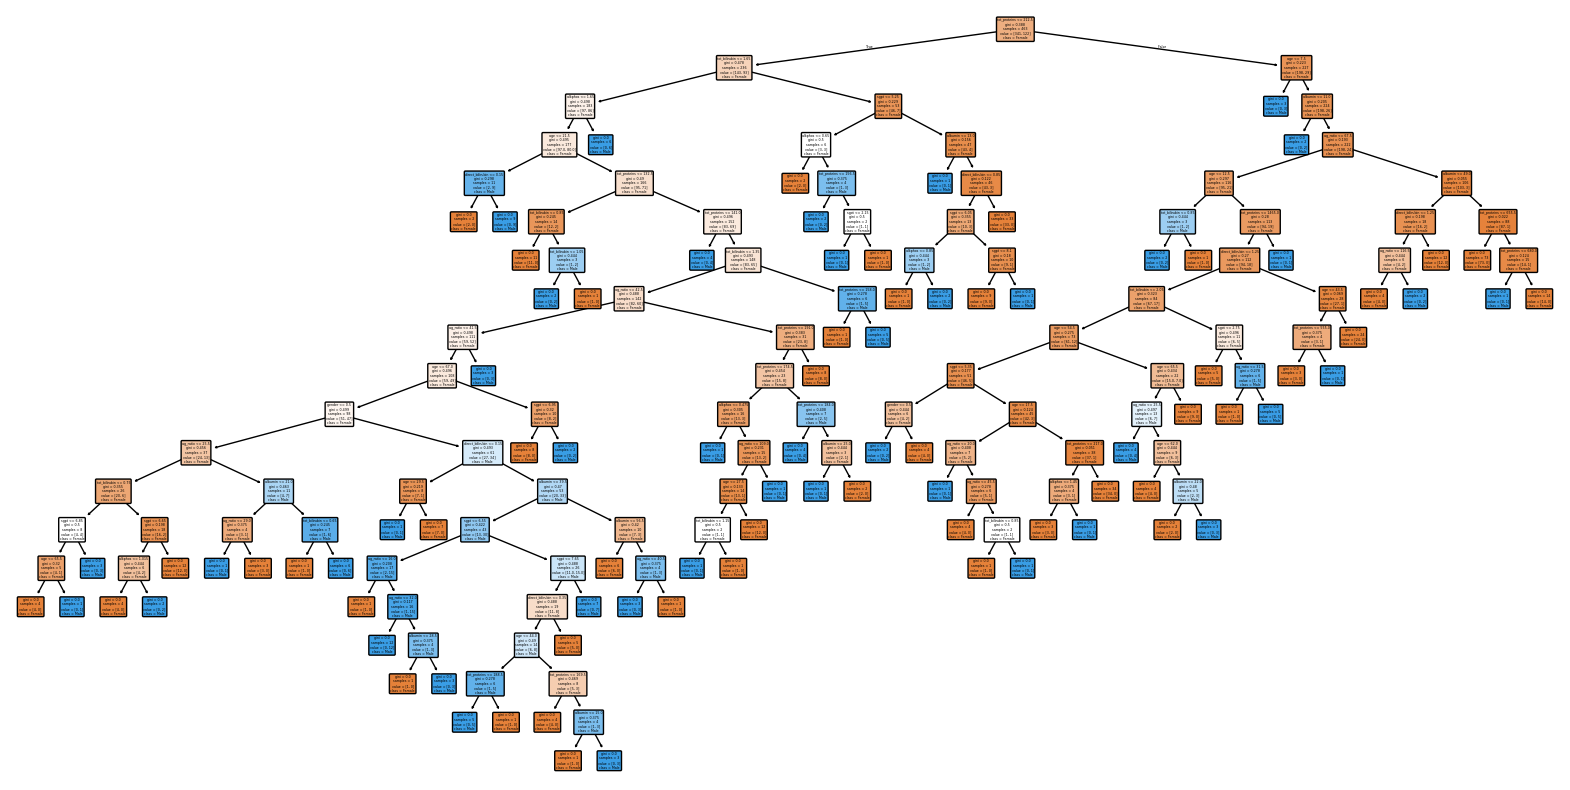

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()

X_train['gender'] = label_encoder.fit_transform(X_train['gender'])
X_test['gender'] = label_encoder.transform(X_test['gender'])

df_model = DecisionTreeClassifier(random_state=42)
df_model.fit(X_train, y_train)

y_pred = df_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(df_model, filled=True, feature_names=X_train.columns, class_names=label_encoder.classes_, rounded=True) #Use X_train.columns instead of X.columns
plt.show()